# Project 1: SAT & ACT Analysis

### Load libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

####  Read In SAT & ACT  Data

In [138]:
act = pd.read_csv('../data/act_2017.csv')
sat = pd.read_csv('../data/sat_2017.csv')

#### Display Data

In [139]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [140]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### Describe Data

In [141]:
sat.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


<span style="color: blue">**Comment:**</span>
In sat_2017, there might be a error entry of 1 of the data (under math) because the mininmum is too low of a value compared to the mean.
<hr>

In [142]:
act.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


<span style="color: blue">**Comment:**</span> In act_2017, there is a missing column when we use describe, due to one/more of the entries is not the same data type as other entries under composite column.
<hr>

#### Does the data look complete? 

In [143]:
sat.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [144]:
act.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

<span style="color: blue">**Answer:**</span> Yes, it seems complete. But however, under ACT data, there is something wrong in composite column therefore when we use the describe function, it is not showing the count, mean, std etc.
<hr>

####  Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

<span style="color: blue">**Aswer:**</span>


**For Math:**
- SAT: Min value:52, Max Value:621
- ACT: Min value:18, Max Value:23.1

**For Science:**
- ACT: Min value: 2.3, Max Value: 24.9

**For Reading:**
- ACT: Min value: 18.0, Max Value: 26.0

**For English:**
- ACT: Min value: 16.3, Max Value: 25.5

**For Evidence-Based Reading and Writing:**
- SAT: Min Value: 482, Max Value:644

<span style="color: blue">**Comment:**</span> 

For Math, there might be an error data entry for SAT as the min value is too small as compared to max value.

For Science, there might be be an error data entry for SAT as the min value is too small as compared to max value.
<hr>

#### Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [145]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [146]:
act.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 5. What are your data types? 
Display the data types of each feature. 

In [147]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [148]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<span style="color: blue">**Answer:**</span>

For act_2017 dataset, column for composite should be int instead of an object datatype.

And for act_2017 and sat_2017, column for participation should be int instead of an object datatype.
<hr>

#### Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [149]:
#replacing % with a space for participation column

def clean_participation(x):
    if isinstance(x, str):
        return(x.replace('%', '').replace(',', ''))
    return(x)

- Fix any individual values preventing other columns from being the appropriate type.

In [150]:
#calling the function "clean_participation" and converting datatype to float

act['Participation'] = act['Participation'].apply(clean_participation).astype('int')
sat['Participation'] = sat['Participation'].apply(clean_participation).astype('int')


In [151]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ KB


- Finish your data modifications by making sure the columns are now typed appropriately.

In [152]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     int64 
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [153]:
#replacing x with a space for composite column

def clean_composite(x):

    if isinstance(x, str):
        return(x.replace('x', '').replace(',', ''))
    return(x)

#calling the function "composite" and converting datatype to float

act['Composite'] = act['Composite'].apply(clean_composite).astype('float')

- Display the data types again to confirm they are correct.

In [154]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


In [155]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     int64 
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


#### Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [156]:
act.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [157]:
sat.head(6)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055
5,Colorado,11,606,595,1201


In [158]:
sat.rename(columns={
    'Evidence-Based Reading and Writing': 'sat_avg_evidence-based_reading_and_writing_in_2017',
    'Participation': 'percentage_of_sat_students_tested_in_2017',
    'Math': 'sat_avg_math_score_in_2017',
    'Total': 'total_avg_score_for_sat_in_2017',
    'State': 'state'
}, inplace=True)

In [159]:
sat.head()

,state,percentage_of_sat_students_tested_in_2017,sat_avg_evidence-based_reading_and_writing_in_2017,sat_avg_math_score_in_2017,total_avg_score_for_sat_in_2017
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [160]:
act.rename(columns={
    'Participation': 'percentage_of_act_students_tested_in_2017',
    'Composite': 'act_avg_composite_score_in_2017',
    'English': 'act_avg_english_score_in_2017',
    'Math': 'act_avg_math_score_in_2017',
    'Reading': 'act_avg_reading_score_in_2017',
    'Science': 'act_avg_science_score_in_2017',
    'State': 'state'
}, inplace=True)

In [161]:
act.head()

,state,percentage_of_act_students_tested_in_2017,act_avg_english_score_in_2017,act_avg_math_score_in_2017,act_avg_reading_score_in_2017,act_avg_science_score_in_2017,act_avg_composite_score_in_2017
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|location| 
|percentage_of_act_students_tested_in_201|float|ACT|participation rate for ACT student| 
|percentage_of_sat_students_tested_in_201|float|SAT|participation rate SAT student|
|act_avg_english_score_in_201|float|ACT|average english score| 
|act_avg_math_score_in_201|float|ACT/SAT|average math score| 
|act_avg_reading_score_in_201|float|ACT|average reading score| 
|act_avg_science_score_in_201|float|ACT|average science score| 
|act_avg_composite_score_in_201|float|ACT|average composite score| 
|sat_avg_evidence-based_reading_and_writing_in_2017|int|SAT| average evidence based reading and writing score|
|sat_avg_math_score_in_2017|int|SAT| average math score|
|total_avg_score_for_sat_in_2017|int|SAT|average total score|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [162]:
#dropping the row #1 "national"

act.drop(act.index[0], inplace=True)

In [163]:
act.head()

,state,percentage_of_act_students_tested_in_2017,act_avg_english_score_in_2017,act_avg_math_score_in_2017,act_avg_reading_score_in_2017,act_avg_science_score_in_2017,act_avg_composite_score_in_2017
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [164]:
act_sat_merge = pd.merge(act, sat, how='left')
act_sat_merge.head()

,state,percentage_of_act_students_tested_in_2017,act_avg_english_score_in_2017,act_avg_math_score_in_2017,act_avg_reading_score_in_2017,act_avg_science_score_in_2017,act_avg_composite_score_in_2017,percentage_of_sat_students_tested_in_2017,sat_avg_evidence-based_reading_and_writing_in_2017,sat_avg_math_score_in_2017,total_avg_score_for_sat_in_2017
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [165]:
act_sat_merge.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

Please refer to file name: Ray Dataset 2018 V1.1

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [166]:
data_2017 = pd.read_csv('../data/combined_2017.csv')
data_2018 = pd.read_csv('../data/combined_2018.csv')

data_merge = pd.merge(data_2017, data_2018, how='left')
data_merge.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [167]:
df = pd.read_csv('../data/final.csv')
df.describe()

,percentage_of_act_students_tested_in_2017,act_avg_english_score_in_2017,act_avg_math_score_in_2017,act_avg_reading_score_in_2017,act_avg_science_score_in_2017,act_avg_composite_score_in_2017,percentage_of_sat_students_tested_in_2017,sat_avg_evidence-based_reading_and_writing_in_2017,sat_avg_math_score_in_2017,total_avg_score_for_sat_in_2017,percentage_of_act_students_tested_in_2018,act_average_composite_score_in_2018,act_average_english_score_in_2018,act_average_math_score_in_2018,act_average_reading_score_in_2018,act_average_science_score_in_2018,percentage_of_sat_students_tested_in_2018,sat_avg_evidence-based_reading_and_writing_in_2018,sat_avg_math_score_in_2018,total_avg_score_for_sat_in_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,547.627451,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,84.909119,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,52.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,522.000000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [168]:
dfstd = np.std(df)

def compute_std(df):
    dfstd = np.std(df)
    return df

np.std(df)

percentage_of_act_students_tested_in_2017             31.824176
act_avg_english_score_in_2017                          2.330488
act_avg_math_score_in_2017                             1.962462
act_avg_reading_score_in_2017                          2.046903
act_avg_science_score_in_2017                          3.151108
act_avg_composite_score_in_2017                        2.000786
percentage_of_sat_students_tested_in_2017             34.929071
sat_avg_evidence-based_reading_and_writing_in_2017    45.216970
sat_avg_math_score_in_2017                            84.072555
total_avg_score_for_sat_in_2017                       91.583511
percentage_of_act_students_tested_in_2018             33.745195
act_average_composite_score_in_2018                    2.085526
act_average_english_score_in_2018                      2.422254
act_average_math_score_in_2018                         2.015707
act_average_reading_score_in_2018                      2.145892
act_average_science_score_in_2018       

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [169]:
{i : compute_std(col) for i, col in dfstd.items()}

{'percentage_of_act_students_tested_in_2017': 31.824175751231806,
 'act_avg_english_score_in_2017': 2.3304876369363363,
 'act_avg_math_score_in_2017': 1.9624620273436781,
 'act_avg_reading_score_in_2017': 2.0469029314842646,
 'act_avg_science_score_in_2017': 3.151107895464408,
 'act_avg_composite_score_in_2017': 2.000786081581989,
 'percentage_of_sat_students_tested_in_2017': 34.92907076664508,
 'sat_avg_evidence-based_reading_and_writing_in_2017': 45.21697020437866,
 'sat_avg_math_score_in_2017': 84.07255521608297,
 'total_avg_score_for_sat_in_2017': 91.58351056778743,
 'percentage_of_act_students_tested_in_2018': 33.745194881997506,
 'act_average_composite_score_in_2018': 2.0855261815801147,
 'act_average_english_score_in_2018': 2.4222536143202795,
 'act_average_math_score_in_2018': 2.015707255555717,
 'act_average_reading_score_in_2018': 2.145891884510421,
 'act_average_science_score_in_2018': 1.8516885484833543,
 'percentage_of_sat_students_tested_in_2018': 36.946619223539415,
 'sa

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<span style="color: blue">**Aswer:**</span>
Manually calculated standard deviations does not really, match up to the values under pandas describe. (slight difference)

For numpy's std method, results matches from the manually calculated standard deviations.
<hr>

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?  
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**Question:** Do any states with 100% participation on a given test have a rate change year-to-year?

<span style="color: blue">**Answer:**</span>

For SAT, District of Columbia.
For ACT, Minnesota, Colorado


df[(df['percentage_of_act_students_tested_in_2017'] > 50) & (df['percentage_of_sat_students_tested_in_2017'] > 50)]

**Question:** Do any states show have >50% participation on *both* tests either year?

<span style="color: blue">**Aswer:**</span> The 3 states shown above has more than 50% participation for both test in 2017.

#FOR 2018 <50% for both test
df[(df['percentage_of_act_students_tested_in_2018'] > 50) & (df['percentage_of_sat_students_tested_in_2018'] > 50)]

**Question:** Do any states show have >50% participation on *both* tests either year?

<span style="color: blue">**Answer:**</span> The 5 states shown above has more than 50% participation for both test in 2018.

#Lowest SAT participation states, 2017
df.sort_values('percentage_of_sat_students_tested_in_2017')[['state','percentage_of_sat_students_tested_in_2017']].head()

<span style="color: blue">**Answer:**</span> North Dakota, Mississippi, Iowa has the lowest sat participation rate in 2017.

#Highest SAT participation states, 2017
df.sort_values('percentage_of_sat_students_tested_in_2017',ascending=False)[['state','percentage_of_sat_students_tested_in_2017']].head(4)

<span style="color: blue">**Answer:**</span> The four states above shows the highest sat participation rate in 2017.

#Highest SAT participation states, 2017
df.sort_values('percentage_of_sat_students_tested_in_2018',ascending=False)[['state','percentage_of_sat_students_tested_in_2018']].head(5)

<span style="color: blue">**Answer:**</span> The four states above shows the highest sat participation rate in 2018.

#Lowest SAT participation states, 2018
df.sort_values('percentage_of_sat_students_tested_in_2018')[['state','percentage_of_sat_students_tested_in_2018']].head()

<span style="color: blue">**Answer:**</span> North Dakota has the lowest participation rate in 2018.

#Highest SAT participation states, 2018
df.sort_values('percentage_of_sat_students_tested_in_2018',ascending=False)[['state','percentage_of_sat_students_tested_in_2018']].head(7)

<span style="color: blue">**Answer:**</span> The five states above has the highest percentage in sat participation rate in 2018.

#Lowest ACT participation states, 2017
df.sort_values('percentage_of_act_students_tested_in_2017')[['state','percentage_of_act_students_tested_in_2017']].head()

<span style="color: blue">**Answer:**</span> Maine has the lowest act participation rate in 2017.

#Highest ACT participation states, 2017
df.sort_values('percentage_of_act_students_tested_in_2017',ascending=False)[['state','percentage_of_act_students_tested_in_2017']].head(17)

<span style="color: blue">**Answer:**</span> The 17 states above shown the highest ACT participation rate in 2017.

#Highest ACT participation states, 2018
df.sort_values('percentage_of_act_students_tested_in_2018',ascending=False)[['state','percentage_of_act_students_tested_in_2018']].head(17)

<span style="color: blue">**Answer:**</span> The 17 states above shown the highest ACT participation rate in 2018.

#Lowest ACT participation states, 2018
df.sort_values('percentage_of_act_students_tested_in_2018')[['state','percentage_of_act_students_tested_in_2018']].head()

<span style="color: blue">**Answer:**</span> Maine had the lowest ACT participation rate in 2018.

#Lowest SAT Scores, 2017
df.sort_values('total_score_for_sat_in_2017')[['state','total_score_for_sat_in_2017']].head()

<span style="color: blue">**Answer:**</span> District of Columbia had the lowest sat score in 2017.

#Highest SAT Scores, 2017
df.sort_values('total_score_for_sat_in_2017', ascending=False)[['state','total_score_for_sat_in_2017']].head()

<span style="color: blue">**Answer:**</span> Minnesota had the highest sat score in 2017.

#Highest SAT Scores, 2017
df.sort_values('act_average_composite_score_in_2017', ascending=False)[['state','act_average_composite_score_in_2017']].head()

#Lowest SAT Scores, 2018
df.sort_values('act_average_composite_score_in_2018')[['state','act_average_composite_score_in_2018']].head()

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

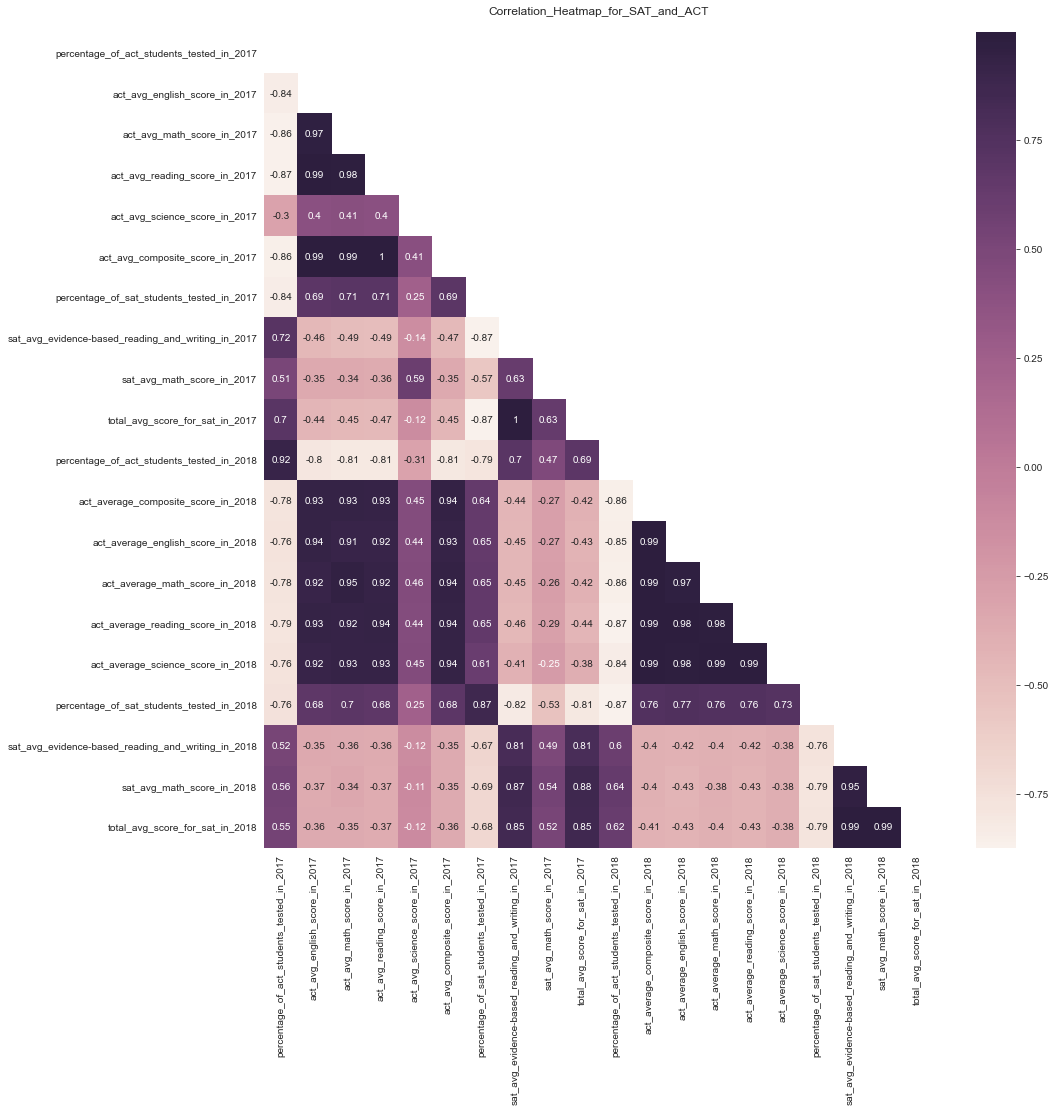

In [170]:
import seaborn as sns

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df.corr(),annot=True,cmap= cmap, center=0, mask = mask)
ax.set_title('Correlation_Heatmap_for_SAT_and_ACT\n');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [171]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

In [172]:
df.head()

,state,percentage_of_act_students_tested_in_2017,act_avg_english_score_in_2017,act_avg_math_score_in_2017,act_avg_reading_score_in_2017,act_avg_science_score_in_2017,act_avg_composite_score_in_2017,percentage_of_sat_students_tested_in_2017,sat_avg_evidence-based_reading_and_writing_in_2017,sat_avg_math_score_in_2017,...,percentage_of_act_students_tested_in_2018,act_average_composite_score_in_2018,act_average_english_score_in_2018,act_average_math_score_in_2018,act_average_reading_score_in_2018,act_average_science_score_in_2018,percentage_of_sat_students_tested_in_2018,sat_avg_evidence-based_reading_and_writing_in_2018,sat_avg_math_score_in_2018,total_avg_score_for_sat_in_2018
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,...,27,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


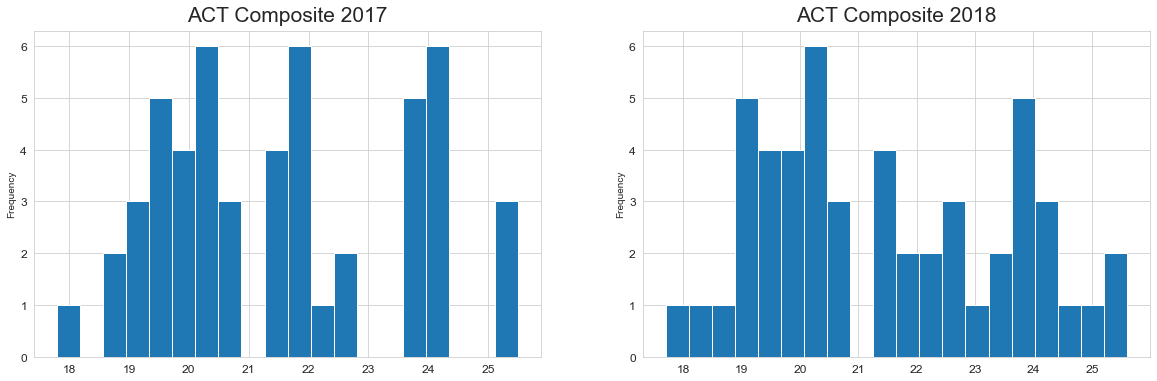

In [173]:
fig, axes = plt.subplots(1,2, figsize=(20,6))
df['act_avg_composite_score_in_2017'].plot(kind='hist', bins=20, fontsize=12, ax=axes[0])\
       .set_title('ACT Composite 2017', fontsize=21, y=1.01);
df['act_average_composite_score_in_2018'].plot(kind='hist', bins=20, fontsize=12, ax=axes[1])\
       .set_title('ACT Composite 2018', fontsize=21, y=1.01);

<span style="color: blue">**Comment:**</span> There seem to be an over all increase of Composite score for ACT from 2017 to 2018.
<hr>

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

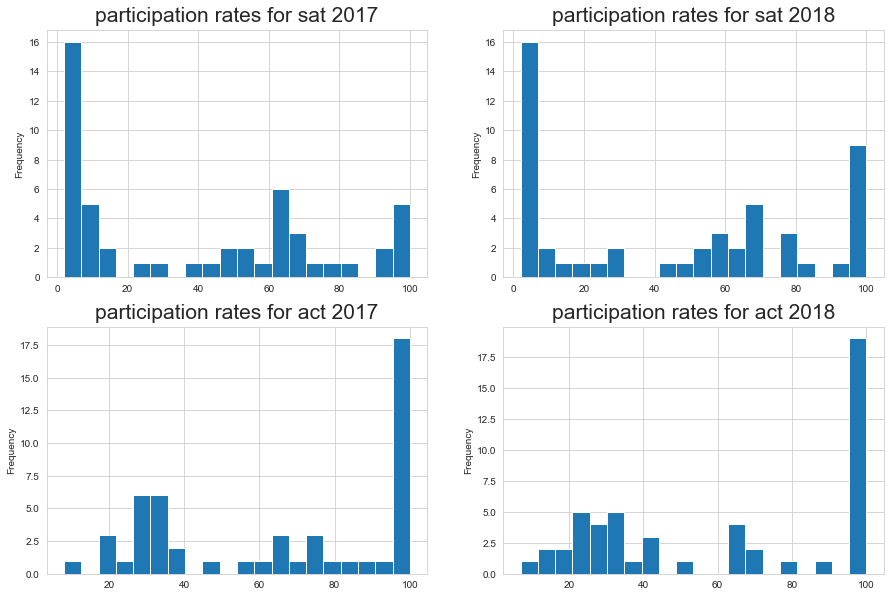

In [174]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

df['percentage_of_sat_students_tested_in_2017'].plot(kind='hist', bins=20, fontsize=10, ax=axes[0][0])\
.set_title('participation rates for sat 2017', fontsize=21, y=1.01);

df['percentage_of_sat_students_tested_in_2018'].plot(kind='hist', bins=20, fontsize=10, ax=axes[0][1])\
.set_title('participation rates for sat 2018', fontsize=21, y=1.01);

df['percentage_of_act_students_tested_in_2017'].plot(kind='hist', bins=20, fontsize=10, ax=axes[1][0])\
.set_title('participation rates for act 2017', fontsize=21, y=1.01);

df['percentage_of_act_students_tested_in_2018'].plot(kind='hist', bins=20, fontsize=10, ax=axes[1][1])\
.set_title('participation rates for act 2018', fontsize=21, y=1.01);

<span style="color: blue">**Comment:**</span> There seem to be an over all decrease of participation rate for SAT students from 2017 to 2018.
<hr>

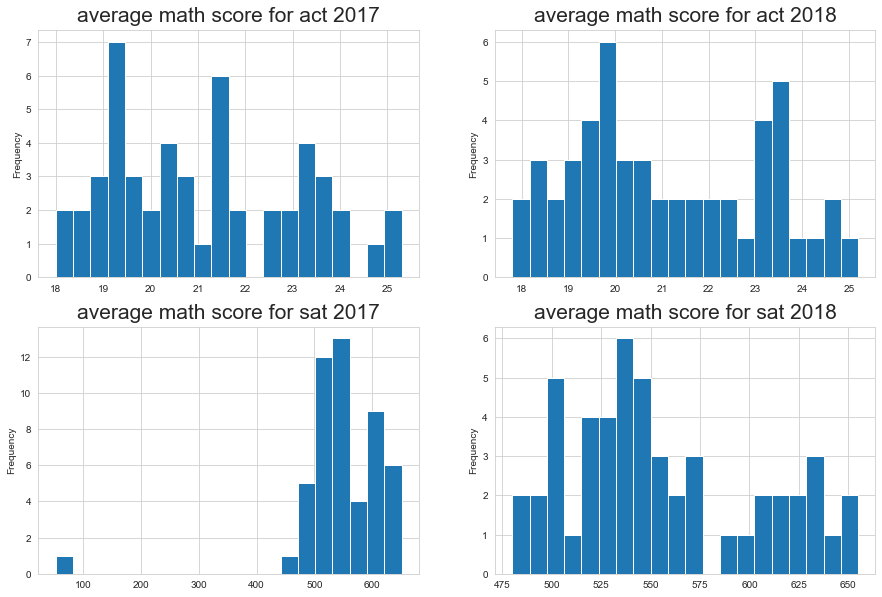

In [175]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

df['act_avg_math_score_in_2017'].plot(kind='hist', bins=20, fontsize=10, ax=axes[0][0])\
.set_title('average math score for act 2017', fontsize=21, y=1.01);

df['act_average_math_score_in_2018'].plot(kind='hist', bins=20, fontsize=10, ax=axes[0][1])\
.set_title('average math score for act 2018', fontsize=21, y=1.01);

df['sat_avg_math_score_in_2017'].plot(kind='hist', bins=20, fontsize=10, ax=axes[1][0])\
.set_title('average math score for sat 2017', fontsize=21, y=1.01);

df['sat_avg_math_score_in_2018'].plot(kind='hist', bins=20, fontsize=10, ax=axes[1][1])\
.set_title('average math score for sat 2018', fontsize=21, y=1.01);

<span style="color: blue">**Comment:**</span> There seem to be an overall decrease of average math score for SAT students from 2017 to 2018.
<hr>

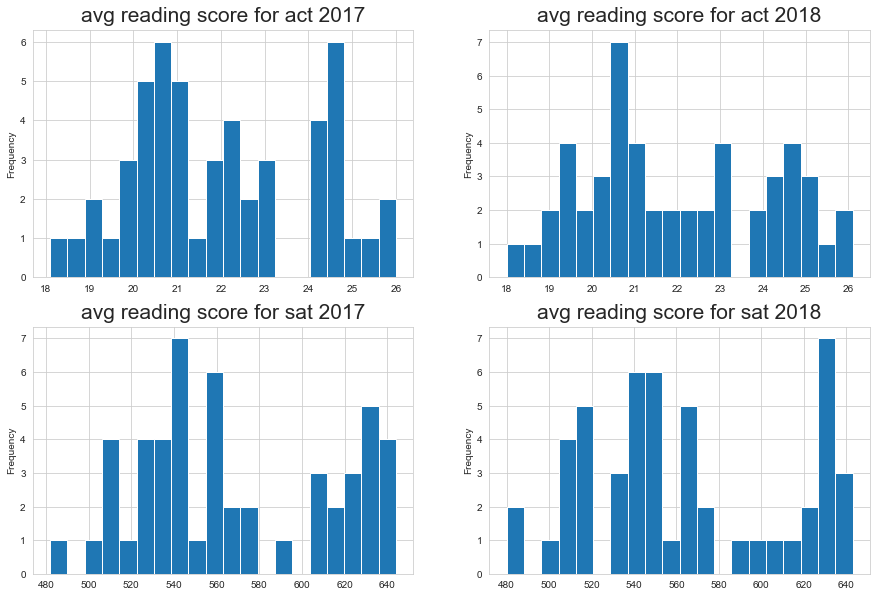

In [176]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

df['act_avg_reading_score_in_2017'].plot(kind='hist', bins=20, fontsize=10, ax=axes[0][0])\
.set_title('avg reading score for act 2017', fontsize=21, y=1.01);

df['act_average_reading_score_in_2018'].plot(kind='hist', bins=20, fontsize=10, ax=axes[0][1])\
.set_title('avg reading score for act 2018', fontsize=21, y=1.01);

df['sat_avg_evidence-based_reading_and_writing_in_2017'].plot(kind='hist', bins=20, fontsize=10, ax=axes[1][0])\
.set_title('avg reading score for sat 2017', fontsize=21, y=1.01);


df['sat_avg_evidence-based_reading_and_writing_in_2018'].plot(kind='hist', bins=20, fontsize=10, ax=axes[1][1])\
.set_title('avg reading score for sat 2018', fontsize=21, y=1.01);



<span style="color: blue">**Comment:**</span> There seem to be an overall increase of average read score for SAT students from 2017 to 2018.
<hr>

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


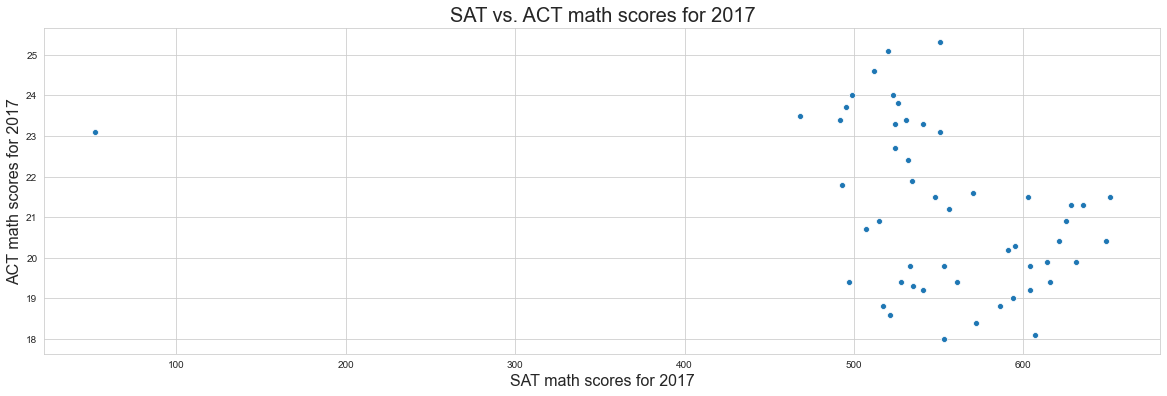

In [177]:
def subplot_scatterplot(column1,column2,xlabel,ylabel,title):
    f = plt.figure(figsize=(20,6))
    sns.set_style('whitegrid')
    sns.scatterplot(x=df['sat_avg_math_score_in_2017'],y=df['act_avg_math_score_in_2017'])
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 20);
    
subplot_scatterplot('sat_average_math_score_2017',
                    'act_average_math_score_2017',
                    'SAT math scores for 2017',
                    'ACT math scores for 2017',
                    'SAT vs. ACT math scores for 2017')

<span style="color: blue">**Answer:**</span> This graph shows that ACT and SAT verbal/reading score is not correlated and that there might be an error data entrance as shown on the left side of the graph.
<hr>

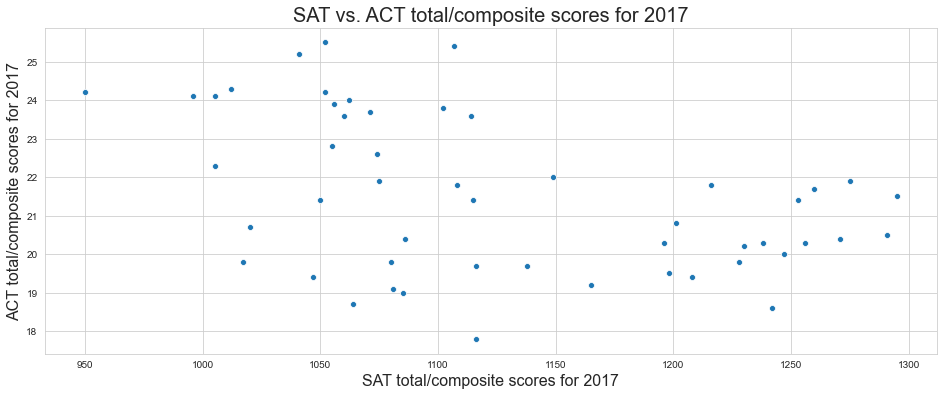

In [178]:
def subplot_scatterplot(column1,column2,xlabel,ylabel,title):
    f = plt.figure(figsize=(16,6))
    sns.set_style('whitegrid')
    sns.scatterplot(x=df['total_avg_score_for_sat_in_2017'],
                    y=df['act_avg_composite_score_in_2017'])
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 20);
    
subplot_scatterplot('total_2017',
                    'composite',
                    'SAT total/composite scores for 2017',
                    'ACT total/composite scores for 2017',
                    'SAT vs. ACT total/composite scores for 2017')



<span style="color: blue">**Answer:**</span> This graph shows that ACT and SAT total/composite score is not correlated. 
<hr>

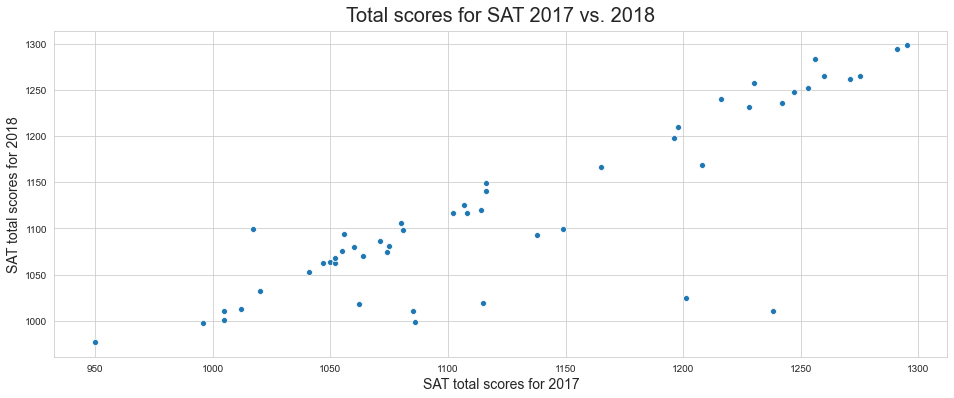

In [179]:
def subplot_scatterplot(column1,column2,xlabel,ylabel,title):
    f = plt.figure(figsize=(16,6))
    sns.set_style('whitegrid')
    sns.scatterplot(x=df['total_avg_score_for_sat_in_2017'],
                    y=df['total_avg_score_for_sat_in_2018'])
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title(title, fontsize = 20, y=1.01);
    
subplot_scatterplot('total_2017',
                    'total_2018',
                    'SAT total scores for 2017',
                    'SAT total scores for 2018',
                    'Total scores for SAT 2017 vs. 2018')

<span style="color: blue">**Answer:**</span> Approximately 8 states has their total score dropped in 2018, as compared to 2017.
Only 1 state had their total score increased.
<hr>

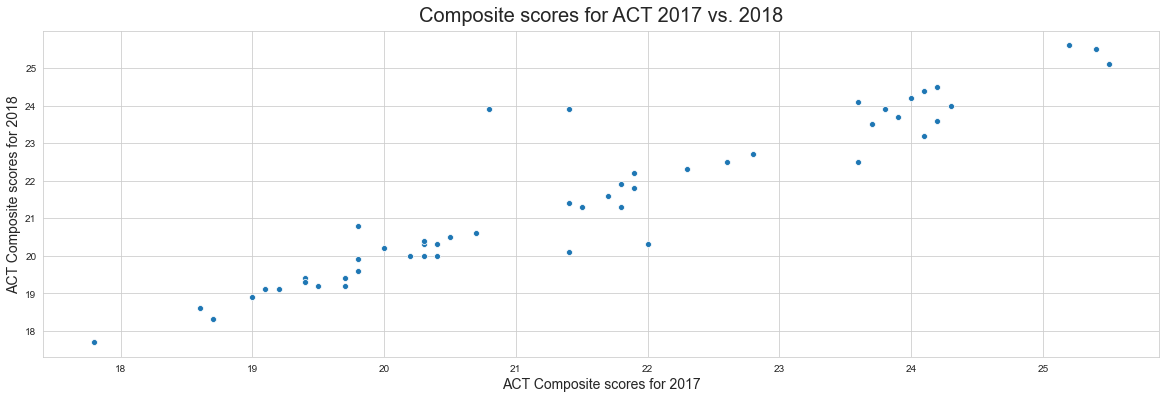

In [180]:
def subplot_scatterplot(column1,column2,xlabel,ylabel,title):
    f = plt.figure(figsize=(20,6))
    sns.set_style('whitegrid')
    sns.scatterplot(x=df['act_avg_composite_score_in_2017'],
                    y=df['act_average_composite_score_in_2018'])
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title(title, fontsize = 20, y=1.01);
    
subplot_scatterplot('composite',
                    'act_average_composite_score_2018',
                    'ACT Composite scores for 2017',
                    'ACT Composite scores for 2018',
                    'Composite scores for ACT 2017 vs. 2018')


<span style="color: blue">**Answer:**</span> A handful of states has their total score dropped in 2018, as compared to 2017. 
Only 2 states had their total score increased.
<hr>

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

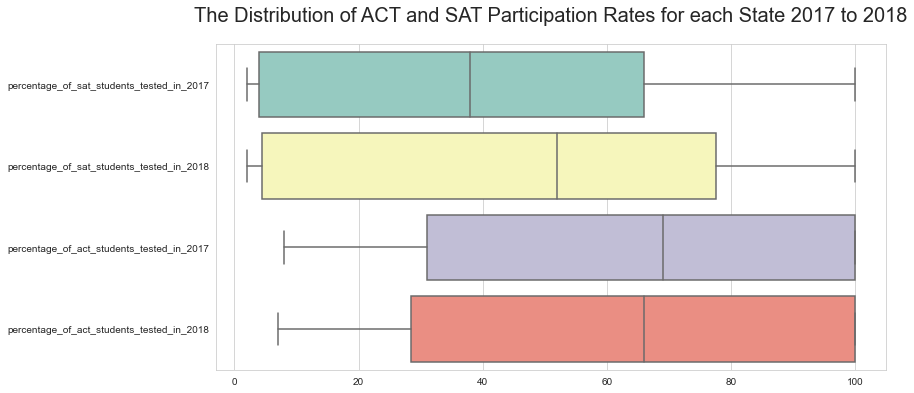

In [181]:
participation_rates = df.loc[:,['percentage_of_sat_students_tested_in_2017',
                                           'percentage_of_sat_students_tested_in_2018',
                                           'percentage_of_act_students_tested_in_2017',
                                           'percentage_of_act_students_tested_in_2018']]
plt.figure(figsize=(12,6))
plt.title('The Distribution of ACT and SAT Participation Rates for each State 2017 to 2018', fontsize=20, y=1.05)
sns.boxplot(data=participation_rates,orient='h', palette='Set3');

<span style="color: blue">**Answer:**</span> There seem to be an overall higher percentage of students taking ACT examinations in 2017 and 2018. 
<hr>

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<span style="color: blue">**Answer:**</span>
No, we do not observe this trend as the data we are given was only 50+ datas which is a mean score from each subject and each state.

In order to produce a normal distributed sample, I need to have the result of each individual student from each state, for each subject.
<hr>

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates  
Explain your answers for each distribution and how you think this will affect estimates made from these data.

<span style="color: blue">**Answer:**</span> Yes, the assumption holds for the above, as the datas are from each other states and each subject as well.
<hr>

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

<span style="color: blue">**Answer:**</span> Yes, it does make sense to conduct statistical inference, as the data given is just based on states only, which does not consists of the whole population.
<hr>

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

<span style="color: blue">**Answer:**</span> Yes, it will be an interesting topic to see if the mean scores of each exmamination is link.
<hr>

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

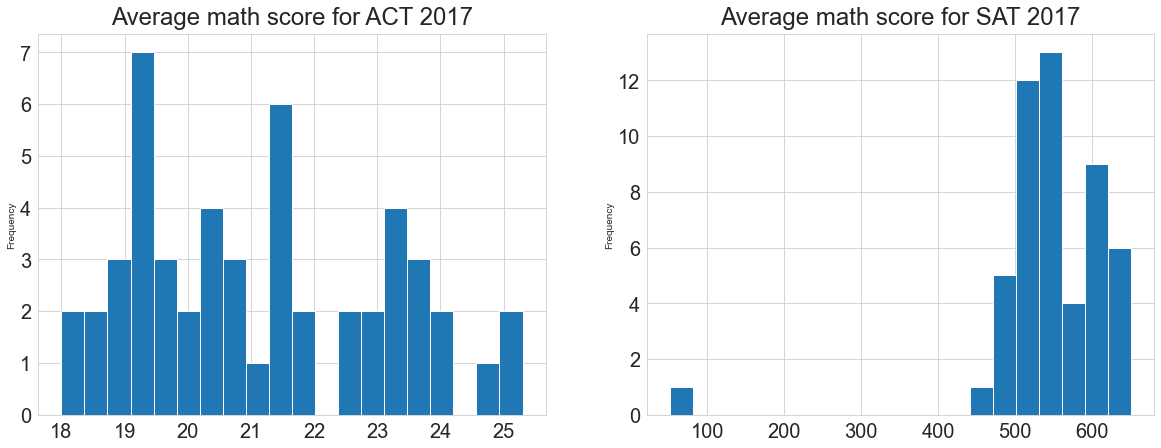

In [182]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

df['act_avg_math_score_in_2017'].plot(kind='hist', bins=20, fontsize=20, ax=axes[0])\
.set_title('Average math score for ACT 2017', fontsize=24, y=1.01);


df['sat_avg_math_score_in_2017'].plot(kind='hist', bins=20, fontsize=20, ax=axes[1])\
.set_title('Average math score for SAT 2017', fontsize=24, y=1.01);


**Comment:** 
Based on the graph above, there is a slight similarity in both graphs. The average of SAT Math score is peaking at around 535, a drop around 575, and second peak in the 600s. This shows a group of states has a better results. Mostly likely this second peak is showing higher mean performance in the group of states.
As for the average of ACT Math score, there is also a slight peak at the right side of the graph.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Answer:**

**Three states chosen:**
- Ohio
- Tennessee
- Idaho

All 3 states have both SAT or ACT **examinations mandatory**, the interesting thing is that the participation rate went up, so does the average score of math and reading and writing subject.

Source: https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/

According to the source above, this is the 2nd year they are introducing a redesigned SAT exam. So perhaps due to growing familarity, scores will increase in the second and third year of implementation as students become more familiar with the test.

In addition, there was a 25 percent increase in SAT test-takers can be attributed to the growth of **SAT School Day**, a program in which students take the SAT in their own school on a weekday.





## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key Takeaways ACT on average has a higher participation rate.
Total mean scores for SAT & ACT are negatively correlated with each other in 2017 data. (Referring Correlation_Heatmap_for_SAT_and_ACT above)

Reason could be, as there is a higher percentage of students taking the ACT which could be more popular choice, for most average scoring students, they would probably be taking just one exam.

Therefore, higher scoring students will take part in SAT to challenge themselves, pushing the score of SAT's average total score to higher.


### Conclusion and Recommendation
**State Chosen:** California

Based on my research California has the highest population among US state. It will be best to target the state with the highest population as this will greatly increase our market share which will increase our overall participation rate.
Data source: https://worldpopulationreview.com/states/

First recommendation is to create more awareness use SAT fee waiver as only 25% of the students are using it.
Data source (page 3): https://reports.collegeboard.org/pdf/2017-total-group-sat-suite-assessments-annual-report.pdf
Thefore if we were to increase the number of student using the SAT fee waiver, this will increase the participation rate.

Second recommendation is to increase the number of states that has mandatory testing of SATS, currently we only have 10 states.
Data source: https://blog.prepscholar.com/act-vs-sat
We would like to increase the number to states to take SATS exam mandatory to 12 which in turn increase our participation rate.


### Additional Data
Additional data such as collecting more granular data on each county or school district in each state, this will help us to identify those low participation rates schools and with that, we can focus more to each individual schools and put in more effort to encourage higher participation rate and awareness of SATs examination.